# Fake News Project
# Modeling - Update After Final Report

# 3.2 COUNT VECTORIZER


# Import libraries

In [2]:
#importing Libraries
import numpy as np
import pandas as pd
from matplotlib.pylab import plt
import seaborn as sns
# from sqlalchemy import create_engine
# import sqlalchemy as 
import sqlite3
import nltk
from nltk.tokenize import word_tokenize

import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import STOPWORDS,WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from sklearn.metrics import f1_score

from joblib import dump, load

In [3]:
import warnings

warnings.filterwarnings(action="ignore")

######################################################################################################
# STAGE 3 - Optimized Analysis for 2 classes, title+content
######################################################################################################


In [4]:
##########################
# STAGE 3 - Optimized Analysis for 2 classes, title+content
##########################

# used dataset: strats_new.pkl (177.830 observations)

# delete missing values in target ("label")
# after dropping missing values in "labels" (target): 111.279 observations

# TARGET: VARIABLE "LABEL"
# 0: articles from reliable sources; 61222 observations
# 1: articles from unreliable sources; 50058 observations



#########
# vectorize text (TF-IDF)
# vectorize test (countvectorizer)

#########



In [5]:
# HOW TO FURTHER IMPROVE MODELS?


### 5: done in Stage 3 
# compare different vectorizing methods on five best performing models
# tfidf, countvectorizer
# --> countvectorizer: results do not get better



### 6: done in Stage 3
# Grid Search
# get optimal hyperparameters for three models
# --> could only be finished for 1 model due to computational limitations



### 7: done in Stage 3 
# vectorize text (word2vec) 
# run some models again
# --> word2vec: results do not get better




################ not in this notebook


### 8: not in this notebook; done for another stratified dataset with 12% of original database
# using OverSample to deal with slightly unbalanced dataset
# Random Oversampling (RandomOverSampler)
# --> not much of an improvement



### 9: not in this notebook
# remove stop words and run five best performing models again



### 10: not in this notebook
# basic Deep Learning Model




In [6]:
# CHOSEN MODELS FROM STAGE 2

# Logistic Regression
# Random Forest
# Passive Aggressive Classifier
# LightGBM 500 rounds
# Stochastic Gradient Descent


# LOADING PREPROCESSED DATASET strats_new.pkl

In [7]:
df = pd.read_pickle("strats_new.pkl")
df.head()

,id,date,source,title,content,author,url,published,published_utc,collection_utc,...,label,bias,factuality,questionable-source,conspiracy-pseudoscience,pro-science,word_count_content,word_count_title,nb_character_content,nb_character_title
0,21stcenturywire--2022-04-26--An Unsettling Rea...,2022-04-26,21stcenturywire,An Unsettling Realization: ‘Mask Zealots are S...,It’s been noted how the fanatical nature of ma...,NEWS WIRE,https://21stcenturywire.com/2022/04/26/an-unse...,"Tue, 26 Apr 2022 10:31:24 +0000",1650983484,1651010407,...,1.0,conspiracy-pseudoscience,2.0,0.0,1.0,0.0,108,8,720,61
1,21stcenturywire--2022-04-24--Episode #416 – ‘S...,2022-04-24,21stcenturywire,Episode #416 – ‘Soldiers of Fortune’ with gues...,Episode #416 of SUNDAY WIRE SHOW resumes this ...,NEWS WIRE,https://21stcenturywire.com/2022/04/24/episode...,"Sun, 24 Apr 2022 14:00:48 +0000",1650823248,1651010408,...,1.0,conspiracy-pseudoscience,2.0,0.0,1.0,0.0,179,11,1143,66
2,21stcenturywire--2022-07-15--UKC News: UK Thou...,2022-07-15,21stcenturywire,"UKC News: UK Thought Police, France Stops Vacc...",Authoritarians in the UK government are gettin...,NEWS WIRE,https://21stcenturywire.com/2022/07/15/ukc-new...,"Fri, 15 Jul 2022 16:26:25 +0000",1657916785,1657922407,...,1.0,conspiracy-pseudoscience,2.0,0.0,1.0,0.0,207,13,1340,82
3,21stcenturywire--2022-05-22--Twitter Audit Fin...,2022-05-22,21stcenturywire,Twitter Audit Finds Half of President Biden’s ...,"After the 2020 election, many Americans began ...",NEWS WIRE,https://21stcenturywire.com/2022/05/22/twitter...,"Sun, 22 May 2022 12:17:48 +0000",1653236268,1653256808,...,1.0,conspiracy-pseudoscience,2.0,0.0,1.0,0.0,504,11,3274,69
4,21stcenturywire--2022-03-11--UKC News: The Tru...,2022-03-11,21stcenturywire,UKC News: The Truth About US Bio Labs + White ...,The high stakes game surrounding the Ukraine c...,NEWS WIRE,https://21stcenturywire.com/2022/03/11/ukc-new...,"Fri, 11 Mar 2022 19:18:16 +0000",1647044296,1647039605,...,1.0,conspiracy-pseudoscience,2.0,0.0,1.0,0.0,147,14,908,70


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177831 entries, 0 to 177830
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        177831 non-null  object 
 1   date                      177831 non-null  object 
 2   source                    177831 non-null  object 
 3   title                     177831 non-null  object 
 4   content                   177831 non-null  object 
 5   author                    177831 non-null  object 
 6   url                       177831 non-null  object 
 7   published                 177831 non-null  object 
 8   published_utc             177831 non-null  int64  
 9   collection_utc            177831 non-null  int64  
 10  country                   106074 non-null  object 
 11  label                     111280 non-null  float64
 12  bias                      111280 non-null  object 
 13  factuality                110158 non-null  f

In [9]:
# For modeling purposes, we deleted missing values in the column "labels" (target variable). 
df.dropna(subset=['label'], axis = 0, inplace=True)

In [10]:
## calculate frequencies of labels
df["label"].value_counts()

# slightly unbalanced

0.0    61222
1.0    50058
Name: label, dtype: int64

# Create X_no2 and Y_no2 (only title and text)

In [11]:
# Create a boolean mask to select rows where the label is not equal to 2
mask = df["label"] != 2

# Use the mask to filter the DataFrame
df_no2 = df[mask]

In [12]:
# Seperating target and data
Y_no2 = df_no2["label"]
X_no2 = df_no2.drop("label", axis=1)


In [13]:
X_no2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111280 entries, 0 to 177830
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        111280 non-null  object 
 1   date                      111280 non-null  object 
 2   source                    111280 non-null  object 
 3   title                     111280 non-null  object 
 4   content                   111280 non-null  object 
 5   author                    111280 non-null  object 
 6   url                       111280 non-null  object 
 7   published                 111280 non-null  object 
 8   published_utc             111280 non-null  int64  
 9   collection_utc            111280 non-null  int64  
 10  country                   106074 non-null  object 
 11  bias                      111280 non-null  object 
 12  factuality                110158 non-null  float64
 13  questionable-source       111280 non-null  f

In [14]:
X_no2.isnull().sum()

id                             0
date                           0
source                         0
title                          0
content                        0
author                         0
url                            0
published                      0
published_utc                  0
collection_utc                 0
country                     5206
bias                           0
factuality                  1122
questionable-source            0
conspiracy-pseudoscience       0
pro-science                    0
word_count_content             0
word_count_title               0
nb_character_content           0
nb_character_title             0
dtype: int64

In [15]:
X_no2.shape

(111280, 20)

In [16]:
Y_no2.info()

<class 'pandas.core.series.Series'>
Int64Index: 111280 entries, 0 to 177830
Series name: label
Non-Null Count   Dtype  
--------------   -----  
111280 non-null  float64
dtypes: float64(1)
memory usage: 1.7 MB


In [17]:
Y_no2.isnull().sum()

0

In [18]:
Y_no2.shape

(111280,)

# VECTORIZING

# COUNT VECTORIZER
## USING CONTENT AND TITLE ONLY

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack, csr_matrix

# Create two CountVectorizer objects
vectorizer1_count = CountVectorizer()
vectorizer2_count = CountVectorizer()

# Seperating content and title(what we want to predict on)
# Fit the vectorizers on the training data
vectorizer1_count.fit(X_no2["content"])
vectorizer2_count.fit(X_no2["title"])

# Transform the text data
X_content_count = vectorizer1_count.transform(X_no2["content"])
X_title_count = vectorizer2_count.transform(X_no2["title"])

# Combine the feature matrices
X_text_count = hstack([X_content_count, X_title_count])

In [20]:
X_text_count

<111280x352812 sparse matrix of type '<class 'numpy.int64'>'
	with 27130350 stored elements in Compressed Sparse Row format>

In [21]:
X_text_count.shape

(111280, 352812)

## SAVE THE VECTORIZER
## ALREADY SAVED

In [22]:
# import joblib

In [23]:
# Save the vectorizers as "vectorizer1_count.pkl"
# joblib.dump(vectorizer1_count, "vectorizer1_count.pkl")


['vectorizer1_count.pkl']

In [24]:
# Save the vectorizers as "vectorizer2_count.pkl"
# joblib.dump(vectorizer2_count, "vectorizer2_count.pkl")


['vectorizer2_count.pkl']

## Create Train / Test Datasets COUNT

In [25]:
from sklearn.model_selection import train_test_split

X_train_text_count, X_test_text_count, Y_train_count, Y_test_count = train_test_split(X_text_count, Y_no2, test_size=0.2, random_state = 2)


In [26]:
X_train_text_count

<89024x352812 sparse matrix of type '<class 'numpy.int64'>'
	with 21713517 stored elements in Compressed Sparse Row format>

In [27]:
X_train_text_count.shape

(89024, 352812)

In [28]:
X_test_text_count

<22256x352812 sparse matrix of type '<class 'numpy.int64'>'
	with 5416833 stored elements in Compressed Sparse Row format>

In [29]:
X_test_text_count.shape

(22256, 352812)

In [30]:
Y_train_count

169056    1.0
160995    0.0
70153     0.0
40328     0.0
54927     1.0
         ... 
62833     0.0
160982    0.0
102715    1.0
166045    0.0
139097    0.0
Name: label, Length: 89024, dtype: float64

In [31]:
Y_train_count.shape

(89024,)

In [32]:
Y_test_count

74321     1.0
174089    0.0
167582    1.0
31490     1.0
167089    1.0
         ... 
48590     0.0
12906     1.0
157618    0.0
34414     0.0
83273     1.0
Name: label, Length: 22256, dtype: float64

In [33]:
Y_test_count.shape

(22256,)

# CREATE LOGISTIC REGRESSION MODEL ON count text data
# use saved model
# model_clf_LogReg_count.joblib


In [34]:
# Instantiate model 
from sklearn.linear_model import LogisticRegression

# clf_LogReg_count = LogisticRegression(C=1.0)


In [35]:
# Fit the model on the training dataset
# clf_LogReg_count.fit(X_train_text_count, Y_train_count)

# only run once, then use saved model


LogisticRegression()

In [42]:
from joblib import dump, load

In [43]:
# LOAD SAVED MODEL
clf_LogReg_count = load("model_clf_LogReg_count.joblib")


In [44]:
y_pred_LogReg_count = clf_LogReg_count.predict(X_test_text_count)


In [45]:
# get accuracy
accuracy_LogReg_count = clf_LogReg_count.score(X_test_text_count, Y_test_count)
accuracy_LogReg_count

# 0.83
# a bit worse as compared to tfidf

0.8315959741193386

In [46]:
# Evaluate the model

f1_LogReg_count = f1_score(Y_test_count, y_pred_LogReg_count)
print("f1 score:", f1_LogReg_count)

# 0.812899
# a bit worse as compared to tfidf

f1 score: 0.8128993610223643


In [47]:
# get confusion matrix
pd.crosstab(Y_test_count, y_pred_LogReg_count, rownames=["true"], colnames=["predict"])


predict,0.0,1.0
true,,
0.0,10366,1850
1.0,1898,8142


In [48]:
from sklearn.metrics import classification_report 

# get classification report
print("Logistic Regression count classification report:\n ", classification_report (Y_test_count, y_pred_LogReg_count))


Logistic Regression count classification report:
                precision    recall  f1-score   support

         0.0       0.85      0.85      0.85     12216
         1.0       0.81      0.81      0.81     10040

    accuracy                           0.83     22256
   macro avg       0.83      0.83      0.83     22256
weighted avg       0.83      0.83      0.83     22256



In [49]:
# create confusion matrix
from sklearn.metrics import confusion_matrix 

cf_matrix_LogReg_count = confusion_matrix(Y_test_count, y_pred_LogReg_count)
print(cf_matrix_LogReg_count)


[[10366  1850]
 [ 1898  8142]]


# SAVE OPTIMIZED Logistic Regression MODEL COUNT
# ALREADY SAVED


In [43]:
# from joblib import dump, load

In [44]:
# dump(clf_LogReg_count, "model_clf_LogReg_count.joblib")

['model_clf_LogReg_count.joblib']

# RANDOM FOREST on text data count
# takes 30 minutes - use saved model
# model_clf_rf_count.joblib


In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
# Instantiate the model
# clf_rf_count = RandomForestClassifier(n_jobs=-1)


In [52]:
# fit model
# clf_rf_count.fit(X_train_text_count, Y_train_count)

# takes 30 minutes
# only run once, then use saved modelfrom joblib import dump, load


In [53]:
from joblib import dump, load

In [54]:
# LOAD SAVED MODEL
clf_rf_count = load("model_clf_rf_count.joblib")


In [55]:
#Predict on the test set 
y_pred_rf_count = clf_rf_count.predict(X_test_text_count)


In [56]:
# get accuracy
accuracy_rf_count = clf_rf_count.score(X_test_text_count, Y_test_count)
accuracy_rf_count

# 0.79
# identical to tfidf

0.7972232207045291

In [57]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_rf_count = f1_score(Y_test_count, y_pred_rf_count)
f1_rf_count

# 0.727
# identical to tfidf


0.7270638040520109

In [58]:
# get confusion matrix
pd.crosstab(Y_test_count, y_pred_rf_count, rownames=["true"], colnames=["predict"])

# overall prediction is quite good
# best prediction: real news as real news (0:0), followed by fake news as fake news (1:1)
# best result for false positives (real news being predicted as fake news)

predict,0.0,1.0
true,,
0.0,11732,484
1.0,4029,6011


In [59]:
from sklearn.metrics import classification_report 

# get classification report
print("Random Forest count classification report:\n ", classification_report (Y_test_count, y_pred_rf_count))


Random Forest count classification report:
                precision    recall  f1-score   support

         0.0       0.74      0.96      0.84     12216
         1.0       0.93      0.60      0.73     10040

    accuracy                           0.80     22256
   macro avg       0.83      0.78      0.78     22256
weighted avg       0.83      0.80      0.79     22256



In [60]:
# create confusion matrix
cf_matrix_rf_count = confusion_matrix(Y_test_count, y_pred_rf_count)
print(cf_matrix_rf_count)


[[11732   484]
 [ 4029  6011]]


# SAVE RANDOM FOREST on text data count
# ALRADY SAVED

In [341]:
# from joblib import dump, load

In [342]:
# dump(clf_rf_count, "model_clf_rf_count.joblib")

['model_clf_rf_count.joblib']

# Passive Aggressive Classifier on text data count


In [61]:
from sklearn.linear_model import PassiveAggressiveClassifier


In [62]:
# Initialize a PassiveAggressiveClassifier
pac_count = PassiveAggressiveClassifier(max_iter=50)


In [63]:
# fit model
pac_count.fit(X_train_text_count, Y_train_count)


PassiveAggressiveClassifier(max_iter=50)

In [64]:
#Predict on the test set 
y_pred_PassAgg_count = pac_count.predict(X_test_text_count)


In [65]:
# get accuracy
accuracy_PassAgg_count= pac_count.score(X_test_text_count, Y_test_count)
accuracy_PassAgg_count

# 0.82

0.8192397555715313

In [66]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_PassAgg_count = f1_score(Y_test_count, y_pred_PassAgg_count)
f1_PassAgg_count

# 0.796

0.7965201557837236

In [67]:
# get confusion matrix
pd.crosstab(Y_test_count, y_pred_PassAgg_count, rownames=["true"], colnames=["predict"])

# overall prediction is quite good but no very good prediction for any case

predict,0.0,1.0
true,,
0.0,10359,1857
1.0,2166,7874


In [68]:
from sklearn.metrics import classification_report 

# get classification report
print("Passive Aggressive count classification report:\n ", classification_report (Y_test_count, y_pred_PassAgg_count))


Passive Aggressive count classification report:
                precision    recall  f1-score   support

         0.0       0.83      0.85      0.84     12216
         1.0       0.81      0.78      0.80     10040

    accuracy                           0.82     22256
   macro avg       0.82      0.82      0.82     22256
weighted avg       0.82      0.82      0.82     22256



In [69]:
# create confusion matrix
cf_matrix_PassAgg_count = confusion_matrix(Y_test_count, y_pred_PassAgg_count)
print(cf_matrix_PassAgg_count)


[[10359  1857]
 [ 2166  7874]]


# LightGBM on text data count - 500 rounds
# takes 7 minutes 
# use saved model
# model_LightGBM500_count.joblib

In [70]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [71]:
# Create a LightGBM dataset for training

LightGMB_train_data_text_count = lgb.Dataset(X_train_text_count.astype(float), label=Y_train_count.astype(float))

# Set the hyperparameters for the LightGBM model
paramsLightGBM_count = {
    'boosting_type': 'gbdt',
    'objective': 'binary',  # Set the appropriate objective for your classification task
    'metric': 'binary_logloss',  # Set the appropriate metric for evaluation
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}


In [70]:
# Train the LightGBM model
# clf_LightGBM_count_500 = lgb.train(paramsLightGBM_count, LightGMB_train_data_text_count, num_boost_round=500)

# takes 7 minutes
# only run, then use saved model


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 18.260831 seconds.
You can set `force_col_wise=true` to remove the overhead.


In [72]:
from joblib import dump, load

In [73]:
# LOAD SAVED MODEL
clf_LightGBM_count_500 = load("model_LightGBM500_count.joblib")


In [74]:
# Make predictions on the test set
y_pred_LightGBM_count_500 = clf_LightGBM_count_500.predict(X_test_text_count.astype(float))
y_pred_LightGBM_count_500_binary = [round(pred) for pred in y_pred_LightGBM_count_500]  
# Convert probability to binary predictions


In [75]:
# Evaluate the model with accuracy
accuracy_LightGBM_count_500 = accuracy_score(Y_test_count, y_pred_LightGBM_count_500_binary)
print("Accuracy LightGBM count 500:", accuracy_LightGBM_count_500)

# 0.867
# a bit worse than tfidf

Accuracy LightGBM count 500: 0.8671369518332135


In [76]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_LightGBM_count_500 = f1_score(Y_test_count, y_pred_LightGBM_count_500_binary)
f1_LightGBM_count_500

# 0.847
# a bit worse than tfidf

0.8470174349423146

In [77]:
# get confusion matrix
pd.crosstab(Y_test_count, y_pred_LightGBM_count_500_binary, rownames=["true"], colnames=["predict"])

# overall prediction is quite good but no super good result for any of the cases

predict,0,1
true,,
0.0,11113,1103
1.0,1854,8186


In [78]:
# Evaluate Model with confusion matrix 
from sklearn.metrics import confusion_matrix 

cf_matrix_LightGBM_count_500 = confusion_matrix(Y_test_count, y_pred_LightGBM_count_500_binary)

print("Confusion Matrix:\n",  cf_matrix_LightGBM_count_500)

Confusion Matrix:
 [[11113  1103]
 [ 1854  8186]]


In [79]:
# Evaluate model with classification report
from sklearn.metrics import classification_report 

print("LightGBM count 500 classification report:\n", classification_report (Y_test_count, y_pred_LightGBM_count_500_binary))


LightGBM count 500 classification report:
               precision    recall  f1-score   support

         0.0       0.86      0.91      0.88     12216
         1.0       0.88      0.82      0.85     10040

    accuracy                           0.87     22256
   macro avg       0.87      0.86      0.86     22256
weighted avg       0.87      0.87      0.87     22256



# SAVE LightGBM 500 boosting rounds MODEL count
# ALREADY SAVED

In [77]:
# from joblib import dump, load

In [78]:
# dump(clf_LightGBM_count_500, "model_LightGBM500_count.joblib")

['model_LightGBM500_count.joblib']

# LightGBM on text data count - 1000 rounds
# takes 14 minutes 
# use saved model
# model_LightGBM1000_count.joblib

In [80]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [81]:
# Create a LightGBM dataset for training

LightGMB_train_data_text_count = lgb.Dataset(X_train_text_count.astype(float), label=Y_train_count.astype(float))

# Set the hyperparameters for the LightGBM model
paramsLightGBM_count = {
    'boosting_type': 'gbdt',
    'objective': 'binary',  # Set the appropriate objective for your classification task
    'metric': 'binary_logloss',  # Set the appropriate metric for evaluation
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}


In [89]:
# Train the LightGBM model
# clf_LightGBM_count_1000 = lgb.train(paramsLightGBM_count, LightGMB_train_data_text_count, num_boost_round=1000)

# takes 14 minutes
# only run once, then use saved model


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 20.217279 seconds.
You can set `force_col_wise=true` to remove the overhead.


In [82]:
from joblib import dump, load

In [83]:
# LOAD SAVED MODEL
clf_LightGBM_count_1000 = load("model_LightGBM1000_count.joblib")


In [84]:
# Make predictions on the test set
y_pred_LightGBM_count_1000 = clf_LightGBM_count_1000.predict(X_test_text_count.astype(float))
y_pred_LightGBM_count_1000_binary = [round(pred) for pred in y_pred_LightGBM_count_1000]  
# Convert probability to binary predictions


In [85]:
# Evaluate the model with accuracy
accuracy_LightGBM_count_1000 = accuracy_score(Y_test_count, y_pred_LightGBM_count_1000_binary)
print("Accuracy LightGBM count 1000:", accuracy_LightGBM_count_1000)

# 0.876


Accuracy LightGBM count 1000: 0.876078360891445


In [86]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_LightGBM_count_1000 = f1_score(Y_test_count, y_pred_LightGBM_count_1000_binary)
f1_LightGBM_count_1000

# 0.858


0.8583898131033065

In [87]:
# get confusion matrix
pd.crosstab(Y_test_count, y_pred_LightGBM_count_1000_binary, rownames=["true"], colnames=["predict"])

# overall prediction is quite good but no super good result for any of the cases

predict,0,1
true,,
0.0,11139,1077
1.0,1681,8359


In [88]:
# Evaluate Model with confusion matrix 
from sklearn.metrics import confusion_matrix 

cf_matrix_LightGBM_count_1000 = confusion_matrix(Y_test_count, y_pred_LightGBM_count_1000_binary)

print("Confusion Matrix:\n",  cf_matrix_LightGBM_count_1000)

Confusion Matrix:
 [[11139  1077]
 [ 1681  8359]]


In [89]:
# Evaluate model with classification report
from sklearn.metrics import classification_report 

print("LightGBM count 1000 classification report:\n", classification_report (Y_test_count, y_pred_LightGBM_count_1000_binary))


LightGBM count 1000 classification report:
               precision    recall  f1-score   support

         0.0       0.87      0.91      0.89     12216
         1.0       0.89      0.83      0.86     10040

    accuracy                           0.88     22256
   macro avg       0.88      0.87      0.87     22256
weighted avg       0.88      0.88      0.88     22256



# SAVE LightGBM 1000 boosting rounds MODEL Count
# ALREADY SAVED

In [96]:
# from joblib import dump, load

In [97]:
# dump(clf_LightGBM_count_1000, "model_LightGBM1000_count.joblib")

['model_LightGBM1000_count.joblib']

# Stochastic Gradient Descent (SGD) on text data count

In [95]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# Create an SGD classifier
sgd_count = SGDClassifier()

In [96]:
# Train the SGD model
sgd_count.fit(X_train_text_count, Y_train_count)


SGDClassifier()

In [97]:
# Make predictions on the test set
y_pred_sgd_count = sgd_count.predict(X_test_text_count)

In [98]:
# Calculate accuracy
accuracy_sgd_count = accuracy_score(Y_test_count, y_pred_sgd_count)
accuracy_sgd_count

# 0.83

0.8315959741193386

In [99]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_sgd_count = f1_score(Y_test_count, y_pred_sgd_count)
f1_sgd_count

# 0.82

0.820222563315426

In [100]:
# Create crosstab
pd.crosstab(Y_test_count, y_pred_sgd_count, rownames=["true"], colnames=["predict"])

# overall prediction is quite good but no super good result for any of the cases

predict,0.0,1.0
true,,
0.0,9958,2258
1.0,1490,8550


In [101]:
from sklearn.metrics import classification_report 

# get classification report
print("SGD count classification report:\n ", classification_report (Y_test_count, y_pred_sgd_count))


SGD count classification report:
                precision    recall  f1-score   support

         0.0       0.87      0.82      0.84     12216
         1.0       0.79      0.85      0.82     10040

    accuracy                           0.83     22256
   macro avg       0.83      0.83      0.83     22256
weighted avg       0.83      0.83      0.83     22256



In [102]:
# create confusion matrix
cf_matrix_sgd_count = confusion_matrix(Y_test_count, y_pred_sgd_count)
print(cf_matrix_sgd_count)

[[9958 2258]
 [1490 8550]]


# COMPARE MODELS ON TEXT DATA ONLY COUNT


In [103]:
# MODELS FOR STAGE 2 (Advanced Models):
# Logistic Regression
# Random Forest   
# Passive Aggressive Classifier 
# LightGBM 500 rounds
# Stochastic Gradient Descent


In [104]:
print("Logistic Regression accuracy score count vectorizer:", accuracy_LogReg_count)
print("Random Forest accuracy score count vectorizer:", accuracy_rf_count)
print("Passive Agressive accuracy score count vectorizer:", accuracy_PassAgg_count)
print("LightGBM accuracy score count vectorizer 500 rounds:", accuracy_LightGBM_count_500)
print("LightGBM accuracy score count vectorizer 1000 rounds:", accuracy_LightGBM_count_1000)
print("Stochastic Gradient Descent accuracy score count vectorizer:", accuracy_sgd_count)


Logistic Regression accuracy score count vectorizer: 0.8315959741193386
Random Forest accuracy score count vectorizer: 0.7972232207045291
Passive Agressive accuracy score count vectorizer: 0.8192397555715313
LightGBM accuracy score count vectorizer 500 rounds: 0.8671369518332135
LightGBM accuracy score count vectorizer 1000 rounds: 0.876078360891445
Stochastic Gradient Descent accuracy score count vectorizer: 0.8315959741193386


In [105]:
print("Logistic Regression f1 score count vectorizer:", f1_LogReg_count)
print("Random Forest f1 score count vectorizer:", f1_rf_count)
print("Passive Agressive f1 score count vectorizer:", f1_PassAgg_count)
print("LightGBM f1 score count vectorizer 500 rounds:", f1_LightGBM_count_500)
print("LightGBM f1 score count vectorizer 1000 rounds:", f1_LightGBM_count_1000)
print("Stochastic Gradient Descent f1 score count vectorizer:", f1_sgd_count)

Logistic Regression f1 score count vectorizer: 0.8128993610223643
Random Forest f1 score count vectorizer: 0.7270638040520109
Passive Agressive f1 score count vectorizer: 0.7965201557837236
LightGBM f1 score count vectorizer 500 rounds: 0.8470174349423146
LightGBM f1 score count vectorizer 1000 rounds: 0.8583898131033065
Stochastic Gradient Descent f1 score count vectorizer: 0.820222563315426


## PLOT: Accuracy of all models count vectorizer

In [106]:
#Creating the Dictionary with model name as key and accuracy as key-value
acc_labels_count_all={'Logistic Regression':accuracy_LogReg_count,
        'Random Forest':accuracy_rf_count,
        'Passive Aggressive':accuracy_PassAgg_count,
        'LightBM 500 rounds':accuracy_LightGBM_count_500,
        'LightBM 1000 rounds':accuracy_LightGBM_count_1000,
        'Stoachstic Gradient Descent':accuracy_sgd_count} 
        

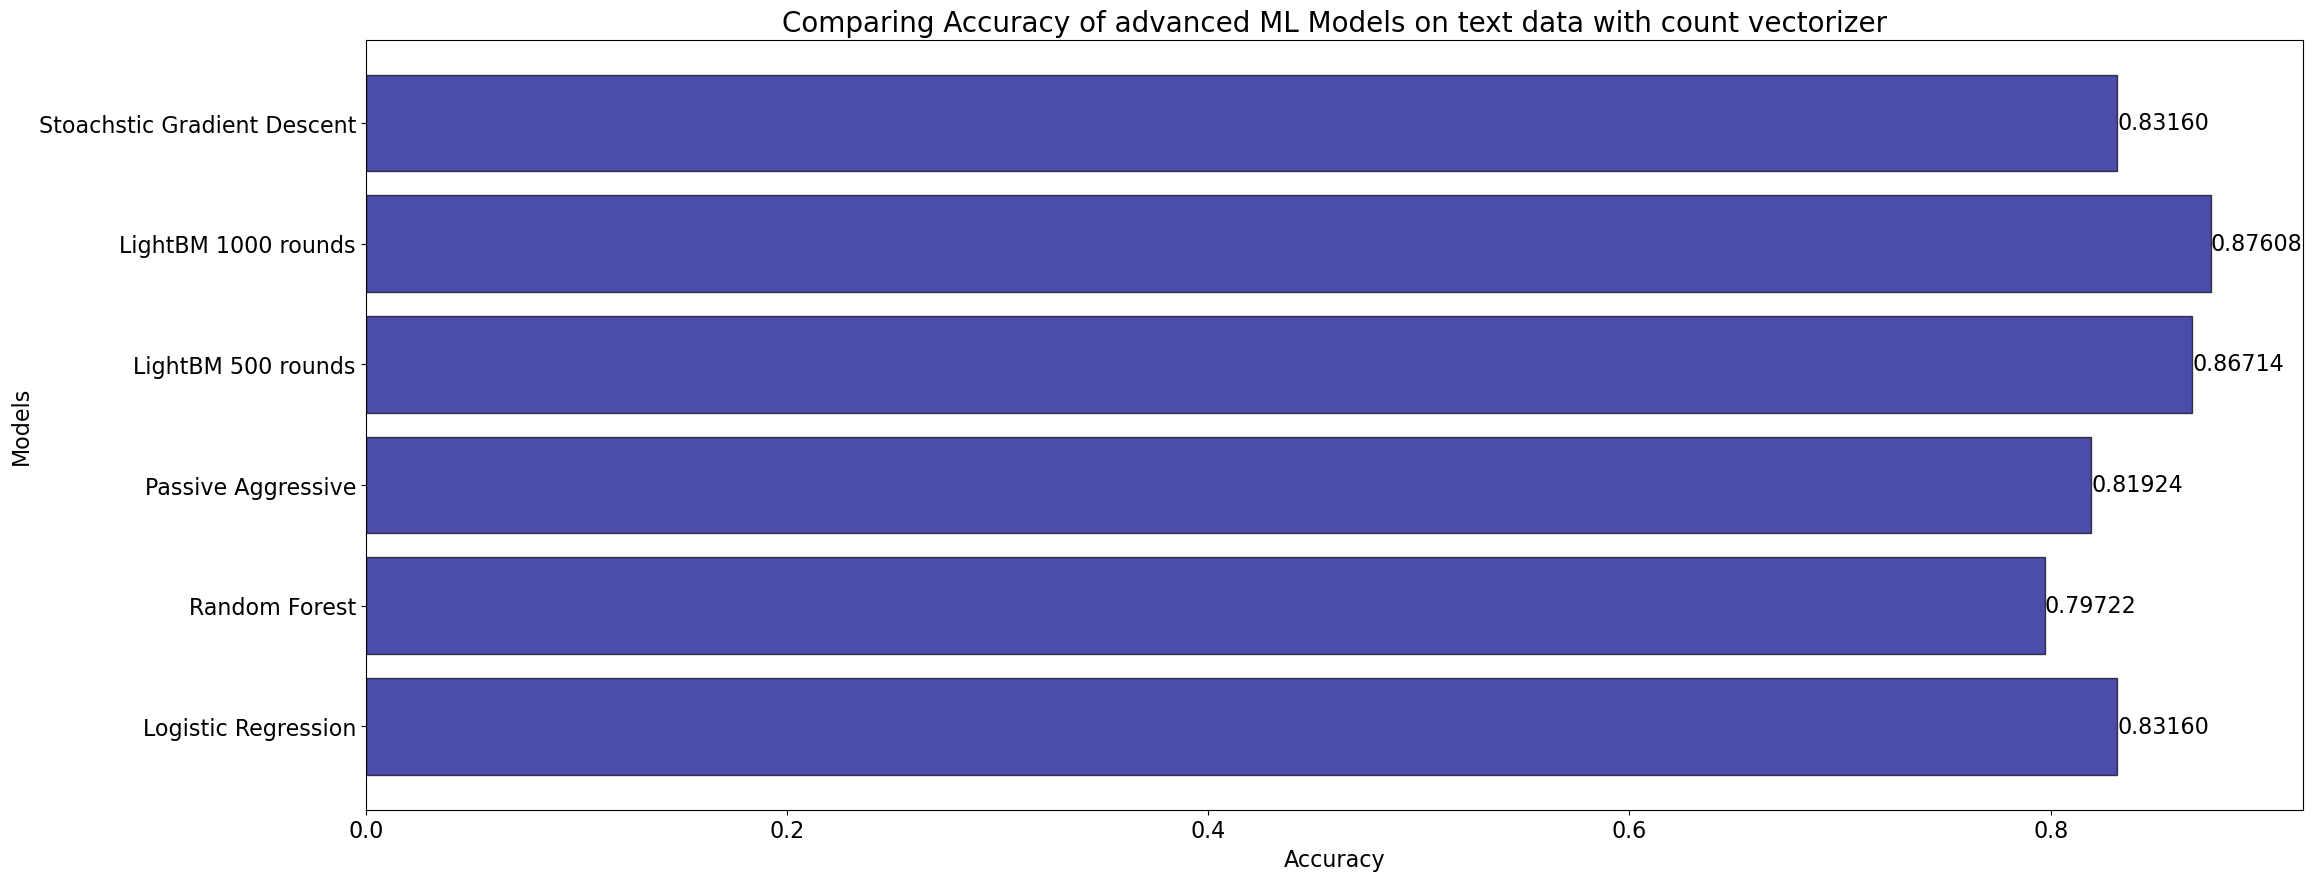

In [107]:
# Data for the chart
acc_labels_all_count = list(acc_labels_count_all.keys())
acc_values_all_count = list(acc_labels_count_all.values())

# Creating the chart
plt.figure(figsize=(25, 10))
plt.title('Comparing Accuracy of advanced ML Models on text data with count vectorizer', fontsize=20)
plt.xlabel('Accuracy', fontsize=16)
plt.ylabel('Models', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)# Increase the plot width to accommodate the values

plt.barh(acc_labels_all_count, acc_values_all_count, color='darkblue', edgecolor='black', linewidth=1, alpha=0.7)

# Displaying values at the end of the bars
for i, value in enumerate(acc_values_all_count):
    plt.text(value, i, f'{value:.5f}', fontsize=16, va='center')

plt.show();

## PLOT: f1 score of all models count vectorizer

In [108]:
#Creating the Dictionary with model name as key and accuracy as key-value
f1_labels_count_all={'Logistic Regression':f1_LogReg_count,
        'Random Forest':f1_rf_count,
        'Passive Aggressive':f1_PassAgg_count,
        'LightBM 500 rounds':f1_LightGBM_count_500,
        'LightBM 1000 rounds':f1_LightGBM_count_1000,
        'Stoachstic Gradient Descent':f1_sgd_count} 
        

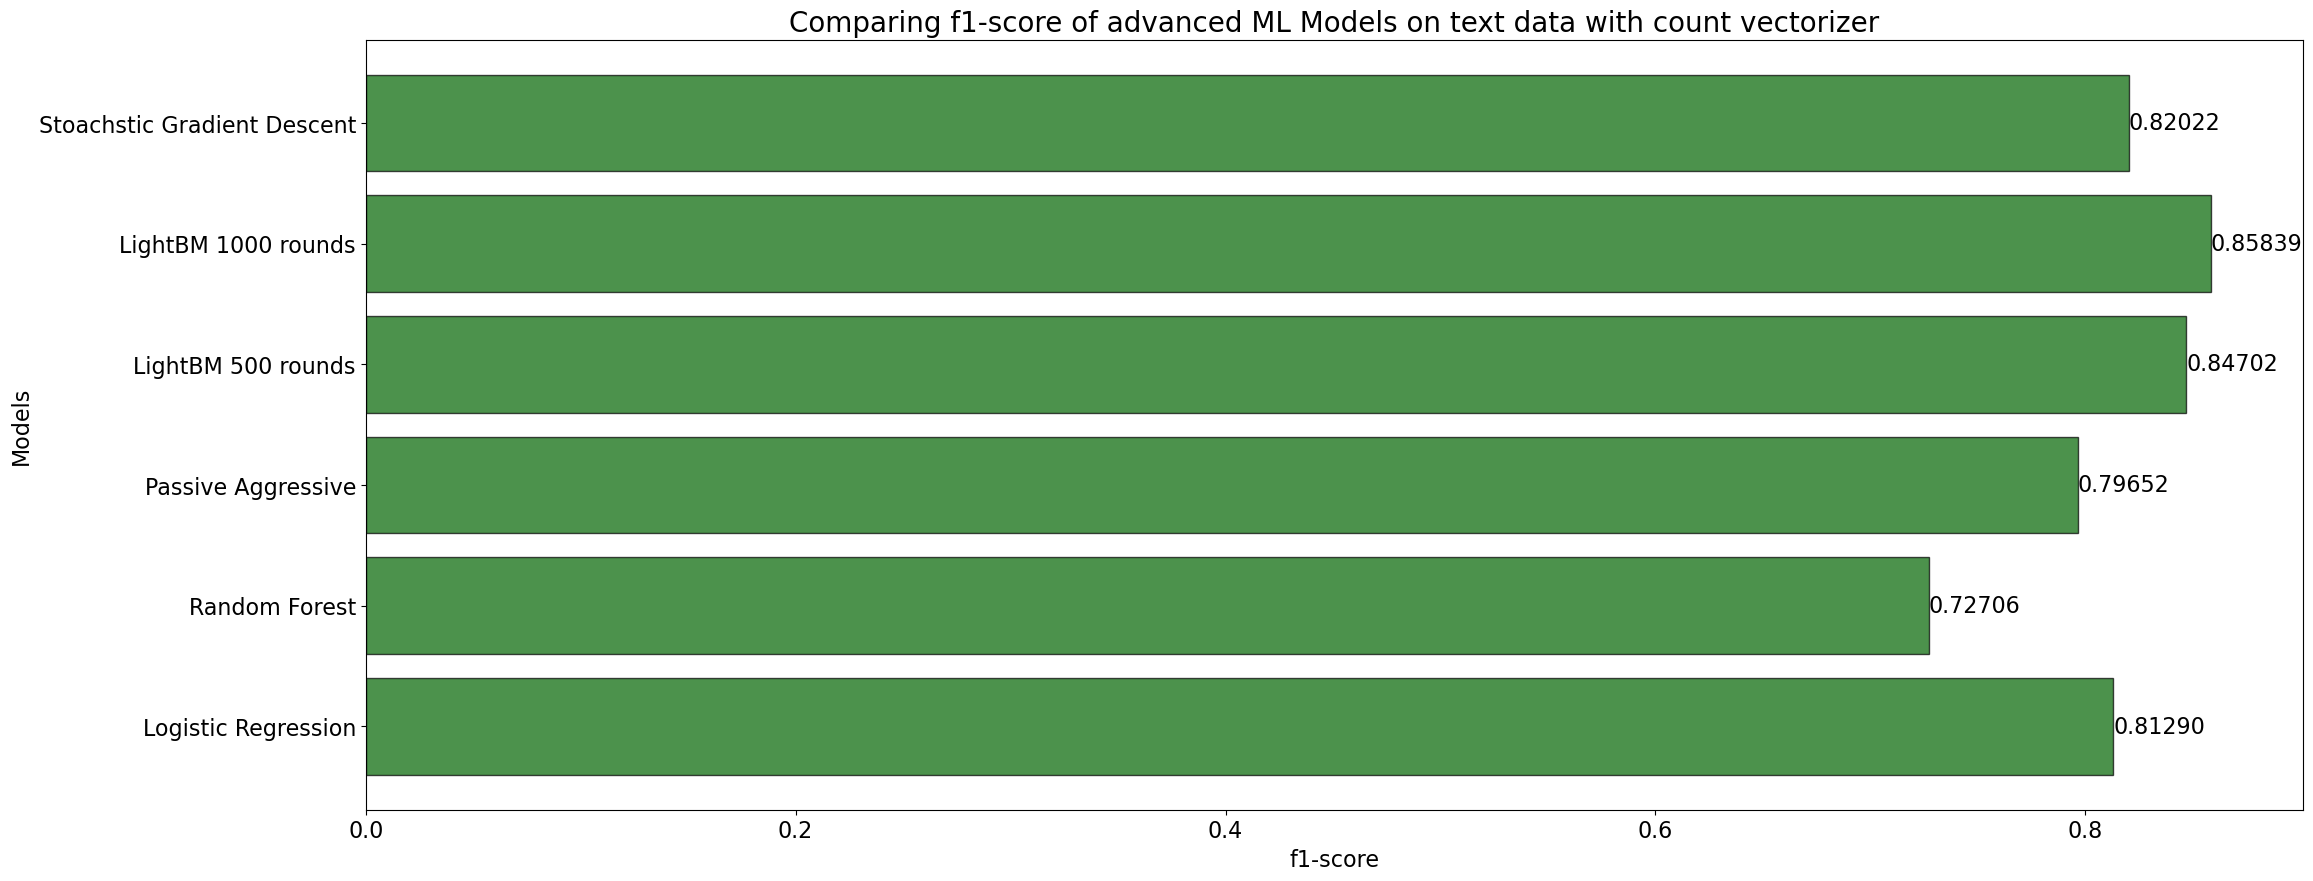

In [109]:
# Data for the chart
f1_labels_all_count = list(f1_labels_count_all.keys())
f1_values_all_count = list(f1_labels_count_all.values())

# Creating the chart
plt.figure(figsize=(25, 10))
plt.title('Comparing f1-score of advanced ML Models on text data with count vectorizer', fontsize=20)
plt.xlabel('f1-score', fontsize=16)
plt.ylabel('Models', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)# Increase the plot width to accommodate the values

plt.barh(f1_labels_all_count, f1_values_all_count, color='darkgreen', edgecolor='black', linewidth=1, alpha=0.7)

# Displaying values at the end of the bars
for i, value in enumerate(f1_values_all_count):
    plt.text(value, i, f'{value:.5f}', fontsize=16, va='center')

plt.show();

# RUN OPTIMIZED MODELS Count Vectorizer


In [110]:
import warnings

warnings.filterwarnings(action="ignore")

## USED DATASETS:
## X_train_text_count, X_test_text_count, Y_train_count, Y_test_count


# CREATE LOGISTIC REGRESSION MODEL ON count text data with optimal parameters
# use saved model
# model_clf_LogReg_count_opt.joblib


In [111]:
# Instantiate model 
from sklearn.linear_model import LogisticRegression

# clf_LogReg_count_opt = LogisticRegression(C=0.1, max_iter=1000, penalty="l1", solver="liblinear")


In [ ]:
# Fit the model on the training dataset
# clf_LogReg_count_opt.fit(X_train_text_count, Y_train_count)

# only run once, then use saved model


In [112]:
from joblib import dump, load

In [114]:
# LOAD SAVED MODEL
clf_LogReg_count_opt = load("model_clf_LogReg_count_opt.joblib")


In [115]:
y_pred_LogReg_count_opt = clf_LogReg_count_opt.predict(X_test_text_count)


In [116]:
# get accuracy
accuracy_LogReg_count_opt = clf_LogReg_count_opt.score(X_test_text_count, Y_test_count)
accuracy_LogReg_count_opt

# 844

0.8448957584471604

In [117]:
# Evaluate the model

f1_LogReg_count_opt = f1_score(Y_test_count, y_pred_LogReg_count_opt)
print("f1 score:", f1_LogReg_count_opt)

# 0.825

f1 score: 0.8250734772473903


In [118]:
# get confusion matrix
pd.crosstab(Y_test_count, y_pred_LogReg_count_opt, rownames=["true"], colnames=["predict"])


predict,0.0,1.0
true,,
0.0,10663,1553
1.0,1899,8141


In [119]:
from sklearn.metrics import classification_report 

# get classification report
print("Logistic Regression count optimized classification report:\n ", classification_report (Y_test_count, y_pred_LogReg_count_opt))


Logistic Regression count optimized classification report:
                precision    recall  f1-score   support

         0.0       0.85      0.87      0.86     12216
         1.0       0.84      0.81      0.83     10040

    accuracy                           0.84     22256
   macro avg       0.84      0.84      0.84     22256
weighted avg       0.84      0.84      0.84     22256



In [120]:
# create confusion matrix
from sklearn.metrics import confusion_matrix 

cf_matrix_LogReg_count_opt = confusion_matrix(Y_test_count, y_pred_LogReg_count_opt)
print(cf_matrix_LogReg_count_opt)


[[10663  1553]
 [ 1899  8141]]


Confusion Matrix for optimized Logistic Regression model on count data


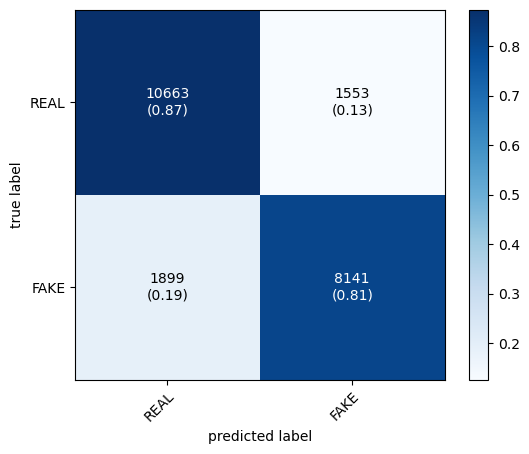

In [121]:
from mlxtend.plotting import plot_confusion_matrix

print("Confusion Matrix for optimized Logistic Regression model on count data")
plot_confusion_matrix(conf_mat = cf_matrix_LogReg_count_opt,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      class_names=['REAL','FAKE'])
plt.show();

# SAVE OPTIMIZED Logistic Regression Model COUNT VECTORIZER
# ALREADY SAVED

In [440]:
# from joblib import dump, load

In [441]:
# dump(clf_LogReg_count_opt, "model_clf_LogReg_count_opt.joblib")

['model_clf_LogReg_count_opt.joblib']

# Random Forest model ON count text data with optimal parameters
# takes 1,5 hour
# use saved model
# model_clf_rf_count_opt.joblib

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [443]:
# Instantiate the model
# clf_rf_count_opt = RandomForestClassifier(n_jobs=-1, criterion="entropy", class_weight={0: 1, 1: 1}, n_estimators=400)


In [444]:
# fit model
# clf_rf_count_opt.fit(X_train_text_count, Y_train_count)

# only run once, then use saved model
# model_clf_rf_count_opt.joblib


RandomForestClassifier(class_weight={0: 1, 1: 1}, criterion='entropy',
                       n_estimators=400, n_jobs=-1)

In [123]:
from joblib import dump, load

In [124]:
# LOAD SAVED MODEL
clf_rf_count_opt = load("model_clf_rf_count_opt.joblib")


In [125]:
#Predict on the test set 
y_pred_rf_count_opt = clf_rf_count_opt.predict(X_test_text_count)


In [126]:
# get accuracy
accuracy_rf_count_opt = clf_rf_count_opt.score(X_test_text_count, Y_test_count)
accuracy_rf_count_opt

# 0.80

0.8038281811646297

In [127]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_rf_count_opt = f1_score(Y_test_count, y_pred_rf_count_opt)
f1_rf_count_opt

# 0.736


0.7366071428571428

In [128]:
# get confusion matrix
pd.crosstab(Y_test_count, y_pred_rf_count_opt, rownames=["true"], colnames=["predict"])

# overall prediction is quite good
# best prediction: real news as real news (0:0), followed by fake news as fake news (1:1)
# best result for false positives (real news being predicted as fake news)

predict,0.0,1.0
true,,
0.0,11785,431
1.0,3935,6105


In [129]:
from sklearn.metrics import classification_report 

# get classification report
print("Random Forest count optimized classification report:\n ", classification_report (Y_test_count, y_pred_rf_count_opt))


Random Forest count optimized classification report:
                precision    recall  f1-score   support

         0.0       0.75      0.96      0.84     12216
         1.0       0.93      0.61      0.74     10040

    accuracy                           0.80     22256
   macro avg       0.84      0.79      0.79     22256
weighted avg       0.83      0.80      0.80     22256



In [130]:
# create confusion matrix
cf_matrix_rf_count_opt = confusion_matrix(Y_test_count, y_pred_rf_count_opt)
print(cf_matrix_rf_count_opt)


[[11785   431]
 [ 3935  6105]]


Confusion Matrix for optimized Random Forest model on count vectorized data


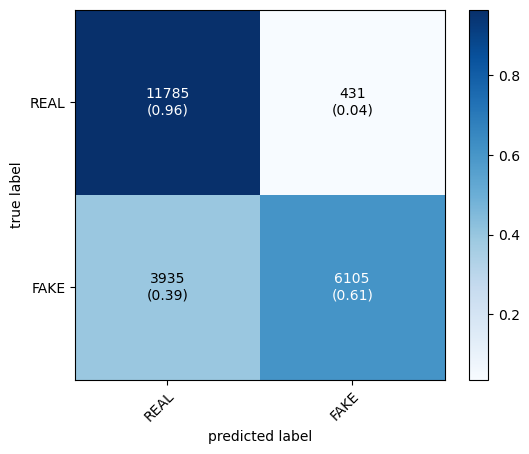

In [131]:
from mlxtend.plotting import plot_confusion_matrix

print("Confusion Matrix for optimized Random Forest model on count vectorized data")
plot_confusion_matrix(conf_mat = cf_matrix_rf_count_opt,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      class_names=['REAL','FAKE'])
plt.show();

# SAVE OPTIMIZED Random Forest Model COUNT VECTORIZER
# ALREADY SAVED

In [452]:
# from joblib import dump, load

In [453]:
# dump(clf_rf_count_opt, "model_clf_rf_count_opt.joblib")

['model_clf_rf_count_opt.joblib']

# SGD model ON count text data with optimal parameters
# use saved model
# model_sgd_count_opt.joblib

In [454]:
# BEST PARAMS FOR SGD:
# {'class_weight': None, 'loss': 'hinge', 'penalty': 'elasticnet'}

In [132]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# Create an SGD classifier
# sgd_count_opt = SGDClassifier(loss= 'hinge', penalty= 'elasticnet')


In [456]:
# Train the SGD model
# sgd_count_opt.fit(X_train_text_count, Y_train_count)

# only run once
# then use saved model


SGDClassifier(penalty='elasticnet')

In [133]:
from joblib import dump, load

In [135]:
# LOAD SAVED MODEL
sgd_count_opt = load("model_sgd_count_opt.joblib")


In [136]:
# Make predictions on the test set
y_pred_sgd_count_opt = sgd_count_opt.predict(X_test_text_count)

In [137]:
# Calculate accuracy
accuracy_sgd_count_opt = accuracy_score(Y_test_count, y_pred_sgd_count_opt)
accuracy_sgd_count_opt

# 0.84

0.8401779295470885

In [138]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_sgd_count_opt = f1_score(Y_test_count, y_pred_sgd_count_opt)
f1_sgd_count_opt

# 0.8151

0.81517277214861

In [139]:
# Create crosstab
pd.crosstab(Y_test_count, y_pred_sgd_count_opt, rownames=["true"], colnames=["predict"])

# overall prediction is quite good but no super good result for any of the cases

predict,0.0,1.0
true,,
0.0,10855,1361
1.0,2196,7844


In [140]:
from sklearn.metrics import classification_report 

# get classification report
print("SGD count optimized classification report:\n ", classification_report (Y_test_count, y_pred_sgd_count_opt))


SGD count optimized classification report:
                precision    recall  f1-score   support

         0.0       0.83      0.89      0.86     12216
         1.0       0.85      0.78      0.82     10040

    accuracy                           0.84     22256
   macro avg       0.84      0.83      0.84     22256
weighted avg       0.84      0.84      0.84     22256



In [141]:
# create confusion matrix
cf_matrix_sgd_count_opt = confusion_matrix(Y_test_count, y_pred_sgd_count_opt)
print(cf_matrix_sgd_count_opt)

[[10855  1361]
 [ 2196  7844]]


Confusion Matrix for optimized SGD model on count vectorized data


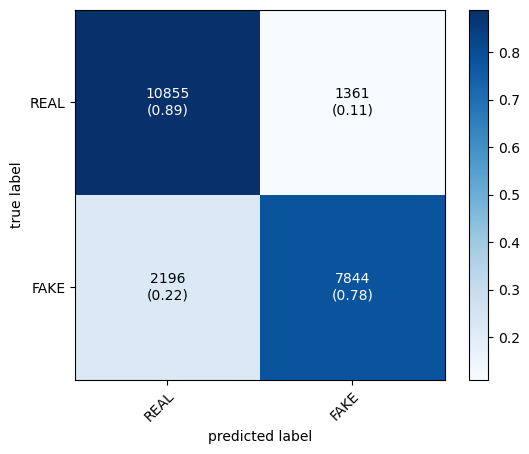

In [142]:
from mlxtend.plotting import plot_confusion_matrix

print("Confusion Matrix for optimized SGD model on count vectorized data")
plot_confusion_matrix(conf_mat = cf_matrix_sgd_count_opt,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      class_names=['REAL','FAKE'])
plt.show();

# SAVE OPTIMIZED SGD Model COUNT VECTORIZER
# ALREADY SAVED

In [464]:
# from joblib import dump, load

In [465]:
# dump(sgd_count_opt, "model_sgd_count_opt.joblib")

['model_sgd_count_opt.joblib']

# STACKING WITH OPTIMAL MODELS AND COUNT VECTORIZER
# RUNS A COUPLE OF HOURS!
# USE SAVED MODEL
# model_stacking_count.joblib

In [157]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_validate, KFold

In [158]:
from joblib import dump, load

In [ ]:
# LOAD SAVED MODELS
# clf_rf_count_opt = load("model_clf_rf_count_opt.joblib")
# sgd_count_opt = load("model_sgd_count_opt.joblib")
# clf_LogReg_count_opt = load("model_clf_LogReg_count_opt.joblib")


In [128]:
# sclf_count.fit(X_train_text_count, Y_train_count)

# takes a couple of hours
# only run once, then load saved model

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(class_weight={0: 1,
                                                                     1: 1},
                                                       criterion='entropy',
                                                       n_estimators=400,
                                                       n_jobs=-1)),
                               ('sgd', SGDClassifier(penalty='elasticnet')),
                               ('lr',
                                LogisticRegression(C=0.1, max_iter=1000,
                                                   penalty='l1',
                                                   solver='liblinear'))],
                   final_estimator=LogisticRegression(C=0.1, max_iter=1000,
                                                      penalty='l1',
                                                      solver='liblinear'))

In [161]:
# LOAD SAVED MODEL
sclf_count = load("model_stacking_count.joblib")


In [162]:
# Make predictions on the test set
y_pred_sclf_count = sclf_count.predict(X_test_text_count)

In [164]:
# Calculate accuracy
accuracy_sclf_count = accuracy_score(Y_test_count, y_pred_sclf_count)
accuracy_sclf_count

# 0.856

0.8567127965492451

In [165]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_sclf_count = f1_score(Y_test_count, y_pred_sclf_count)
f1_sclf_count

# 0.843

0.8431305032219981

In [166]:
# Create crosstab
pd.crosstab(Y_test_count, y_pred_sclf_count, rownames=["true"], colnames=["predict"])


predict,0.0,1.0
true,,
0.0,10497,1719
1.0,1470,8570


In [167]:
from sklearn.metrics import classification_report 

# get classification report
print("Stacking Classifier count vectorizer optimized classification report:\n ", classification_report (Y_test_count, y_pred_sclf_count))


Stacking Classifier count vectorizer optimized classification report:
                precision    recall  f1-score   support

         0.0       0.88      0.86      0.87     12216
         1.0       0.83      0.85      0.84     10040

    accuracy                           0.86     22256
   macro avg       0.86      0.86      0.86     22256
weighted avg       0.86      0.86      0.86     22256



In [168]:
# create confusion matrix
cf_matrix_sclf_count = confusion_matrix(Y_test_count, y_pred_sclf_count)
print(cf_matrix_sclf_count)

[[10497  1719]
 [ 1470  8570]]


Confusion Matrix for optimized Stacking Classifier model on count vectorized data


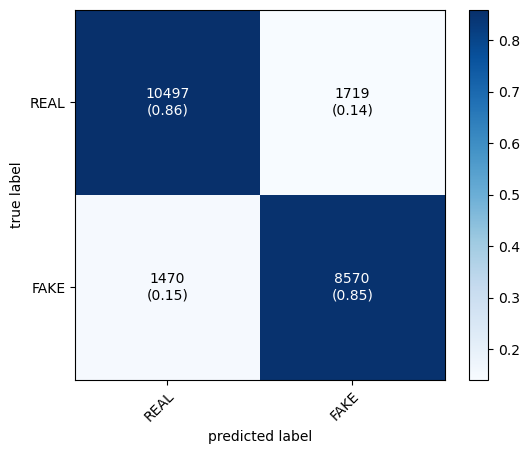

In [169]:
from mlxtend.plotting import plot_confusion_matrix

print("Confusion Matrix for optimized Stacking Classifier model on count vectorized data")
plot_confusion_matrix(conf_mat = cf_matrix_sclf_count,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      class_names=['REAL','FAKE'])
plt.show();

# SAVE COUNT VECTORIZER STACKING MODEL

In [201]:
# from joblib import dump, load

In [202]:
# dump(sclf_count, "model_stacking_count.joblib")

['model_stacking_count.joblib']

# Cross-Fold COUNT
# RUNS 12 HOURS

In [179]:
cv3 = KFold(n_splits=3, shuffle=True)

In [ ]:
# sclf_count = StackingClassifier([("rf", clf_rf_count_opt), ("sgd", sgd_count_opt), ("lr", clf_LogReg_count_opt)], 
#                                 final_estimator = clf_LogReg_count_opt)


In [ ]:
# X_train_text_count, Y_train_count

In [180]:
for clf, label in zip([clf_rf_count_opt, sgd_count_opt, clf_LogReg_count_opt, sclf_count], 
                      ["Random Forest", "SGD", "Logistic Regression", "Stacking Classifier"]):
    scores = cross_validate(clf, X_train_text_count, Y_train_count, cv=cv3, scoring=["accuracy", "f1"])
    print(label, "accuracy: ", scores["test_accuracy"].mean(), scores["test_accuracy"].std(), "f1: ", scores["test_f1"].mean(), scores["test_f1"].std())


Random Forest accuracy:  0.794055546259241 0.0023409336649433637 f1:  0.7191389536316687 0.0041806106214762615
SGD accuracy:  0.8253729823077726 0.0073926268652640395 f1:  0.8034789252856509 0.003635437902147882
Logistic Regression accuracy:  0.8387401135964856 0.0016121162481036564 f1:  0.8173881220251427 0.0014712838138870332
Stacking Classifier accuracy:  0.8552638175806035 0.008199539718569826 f1:  0.8379921396248794 0.004912435728972732


# COMPARE OPTIMIZED MODELS ON TEXT DATA ONLY COUNT


In [172]:
# MODELS FOR STAGE 3 (Optimized Models):

# Logistic Regression
# Random Forest
# Stochastic Gradient Descent
# Stacking Model TFIDF


# COMPARE OPTIMAL COUNT VECTORIZER MODELS 


In [173]:
print("Logistic Regression optimized accuracy score count:", accuracy_LogReg_count_opt)
print("Random Forest optimized accuracy score count:", accuracy_rf_count_opt)
print("Stochastic Gradient Descent optimized accuracy score count:", accuracy_sgd_count_opt)
print("Stacking Classifier accuracy score count:", accuracy_sclf_count)

Logistic Regression optimized accuracy score count: 0.8448957584471604
Random Forest optimized accuracy score count: 0.8038281811646297
Stochastic Gradient Descent optimized accuracy score count: 0.8401779295470885
Stacking Classifier accuracy score count: 0.8567127965492451


In [174]:
print("Logistic Regression optimized f1 score count:", f1_LogReg_count_opt)
print("Random Forest optimized f1 score count:", f1_rf_count_opt)
print("Stochastic Gradient Descent optimized f1 score count:", f1_sgd_count_opt)
print("Stacking Classifier f1 score count:", f1_sclf_count)

Logistic Regression optimized f1 score count: 0.8250734772473903
Random Forest optimized f1 score count: 0.7366071428571428
Stochastic Gradient Descent optimized f1 score count: 0.81517277214861
Stacking Classifier f1 score count: 0.8431305032219981


## PLOT: Accuracy of final optimized models count vectorizer


In [175]:
#Creating the Dictionary with model name as key and accuracy as key-value
acc_labels_count_sel_opt={'Logistic Regression':accuracy_LogReg_count_opt,
        'Random Forest':accuracy_rf_count_opt,
        'Stoachstic Gradient Descent':accuracy_sgd_count_opt,
        'Stacking':accuracy_sclf_count} 
        

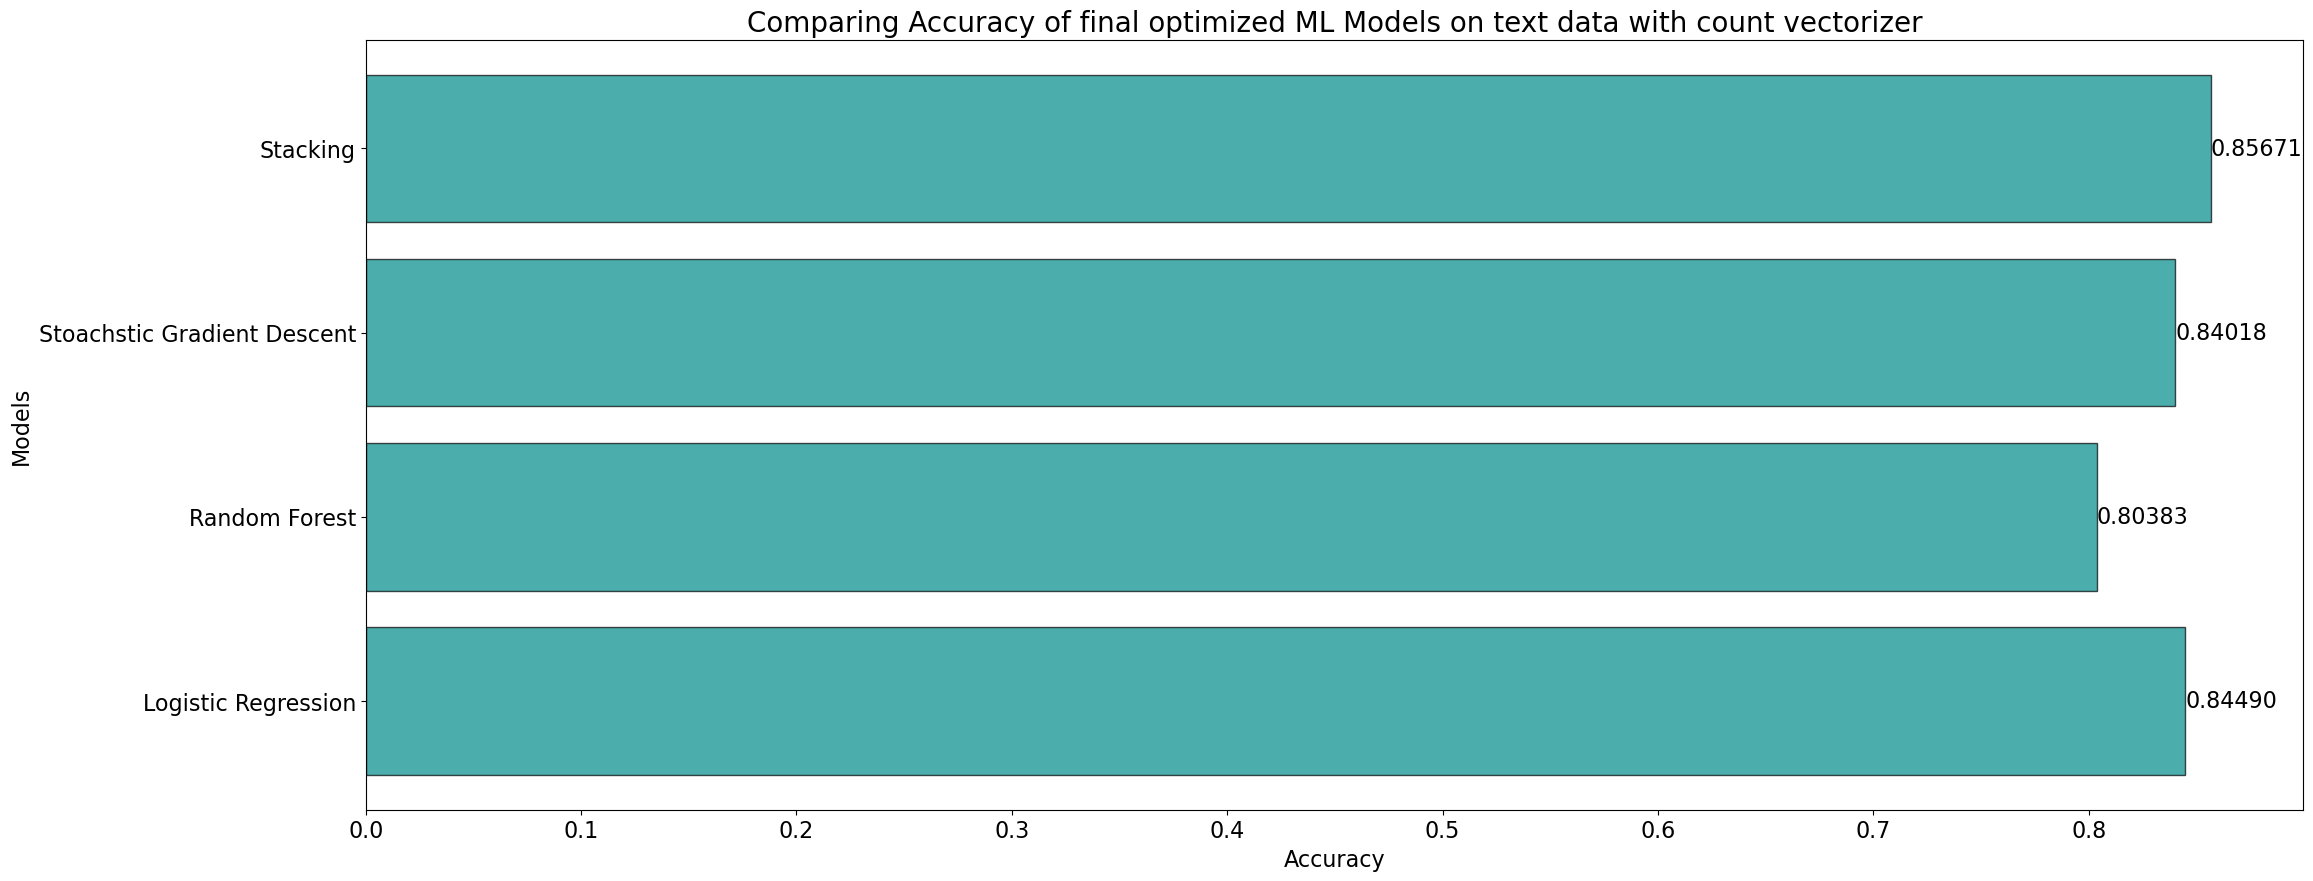

In [176]:
# Data for the chart
acc_labels_sel_count_opt = list(acc_labels_count_sel_opt.keys())
acc_values_sel_count_opt = list(acc_labels_count_sel_opt.values())

# Creating the chart
plt.figure(figsize=(25, 10))
plt.title('Comparing Accuracy of final optimized ML Models on text data with count vectorizer', fontsize=20)
plt.xlabel('Accuracy', fontsize=16)
plt.ylabel('Models', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)# Increase the plot width to accommodate the values

plt.barh(acc_labels_sel_count_opt, acc_values_sel_count_opt, color='darkcyan', edgecolor='black', linewidth=1, alpha=0.7)

# Displaying values at the end of the bars
for i, value in enumerate(acc_values_sel_count_opt):
    plt.text(value, i, f'{value:.5f}', fontsize=16, va='center')

plt.show();

## PLOT: f1 score of final optimized models count vectorizer


In [177]:
#Creating the Dictionary with model name as key and accuracy as key-value
f1_labels_count_sel_opt={'Logistic Regression':f1_LogReg_count_opt,
        'Random Forest':f1_rf_count_opt,
        'Stoachstic Gradient Descent':f1_sgd_count_opt,
        'Stacking':f1_sclf_count} 
        

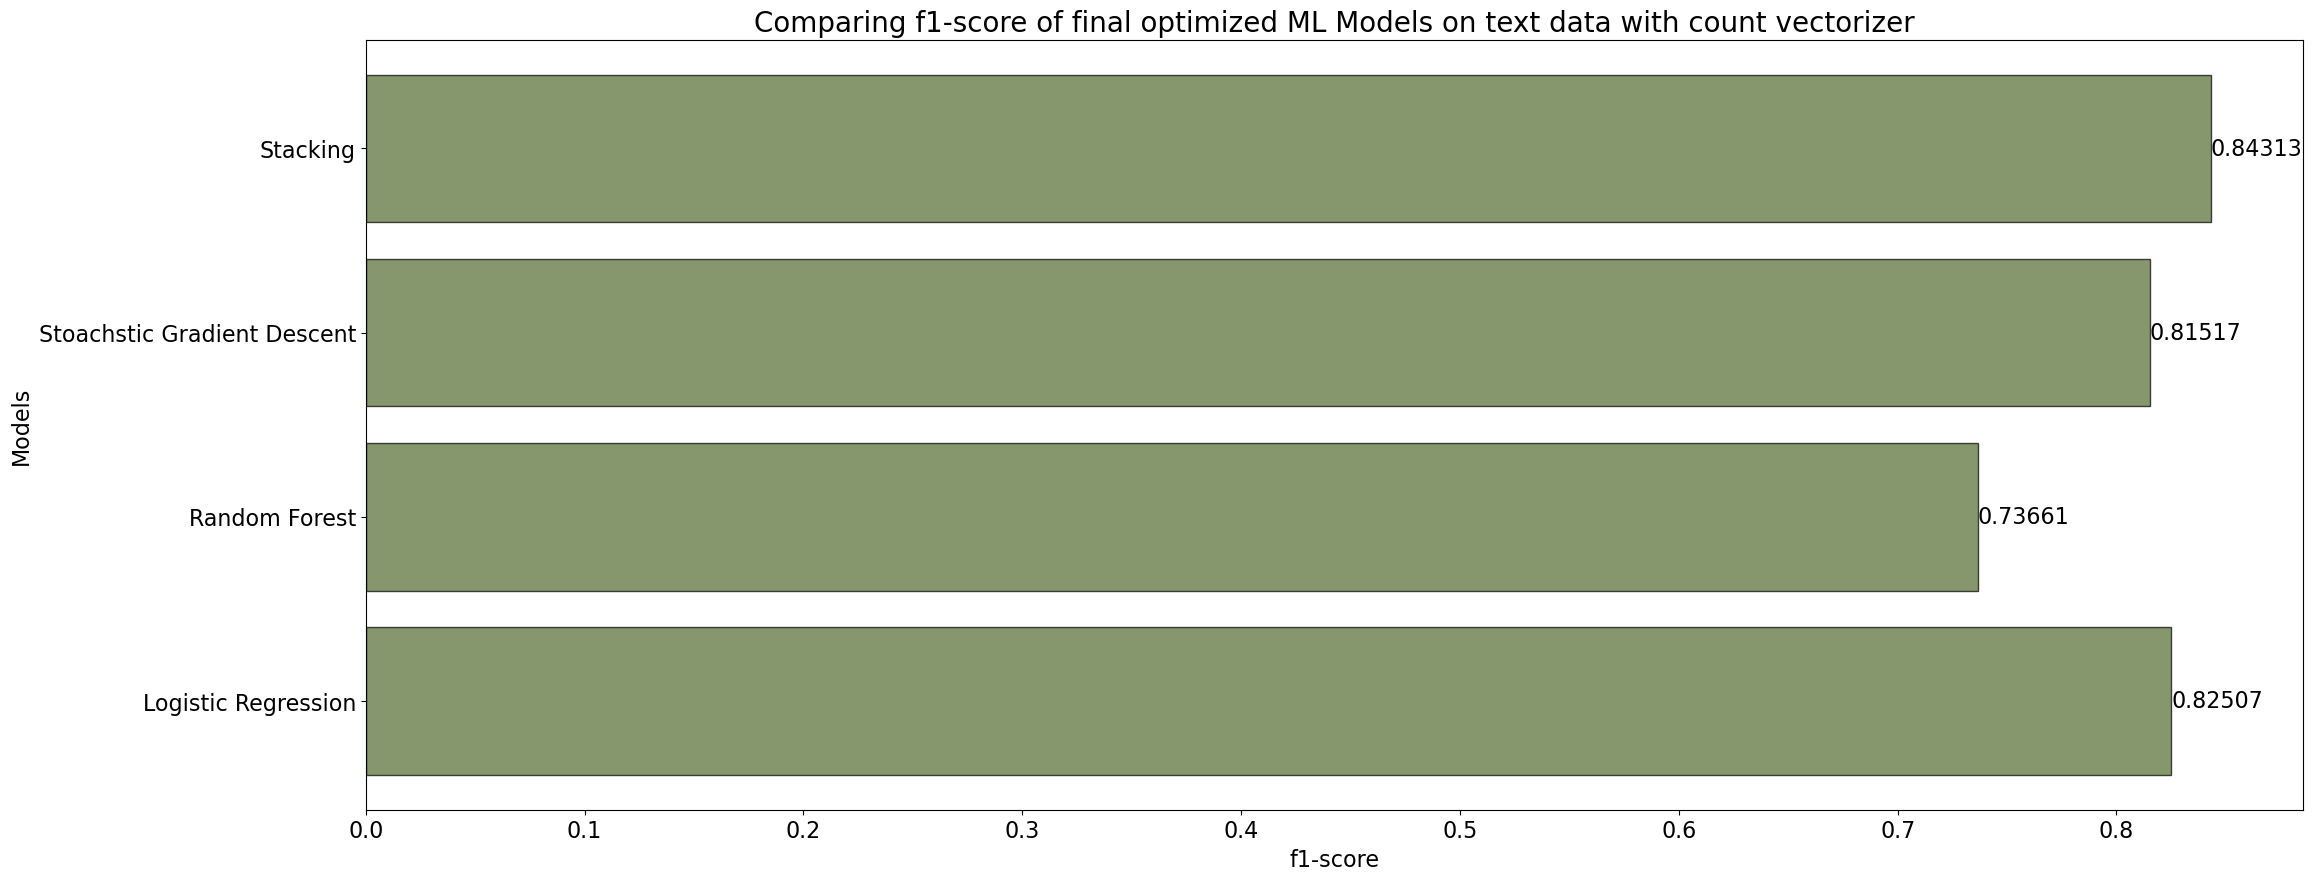

In [178]:
# Data for the chart
f1_labels_sel_count_opt = list(f1_labels_count_sel_opt.keys())
f1_values_sel_count_opt = list(f1_labels_count_sel_opt.values())

# Creating the chart
plt.figure(figsize=(25, 10))
plt.title('Comparing f1-score of final optimized ML Models on text data with count vectorizer', fontsize=20)
plt.xlabel('f1-score', fontsize=16)
plt.ylabel('Models', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)# Increase the plot width to accommodate the values

plt.barh(f1_labels_sel_count_opt, f1_values_sel_count_opt, color='darkolivegreen', edgecolor='black', linewidth=1, alpha=0.7)

# Displaying values at the end of the bars
for i, value in enumerate(f1_values_sel_count_opt):
    plt.text(value, i, f'{value:.5f}', fontsize=16, va='center')

plt.show();
